# PROBLEM STATEMENT

# Credit Card Lead Prediction

Happy Customer Bank is a mid-sized private bank that deals in all kinds of banking products, like Savings accounts, Current accounts, investment products, credit products, among other offerings.



The bank also cross-sells products to its existing customers and to do so they use different kinds of communication like tele-calling, e-mails, recommendations on net banking, mobile banking, etc. 



In this case, the Happy Customer Bank wants to cross sell its credit cards to its existing customers. The bank has identified a set of customers that are eligible for taking these credit cards.



Now, the bank is looking for your help in identifying customers that could show higher intent towards a recommended credit card, given:

Customer details (gender, age, region etc.)
Details of his/her relationship with the bank (Channel_Code,Vintage, 'Avg_Asset_Value etc.)

# Step 1  :  Importing relevent libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Step 2 : Import train and test data

In [2]:
train = pd.read_csv('train_s3TEQDk.csv')
test = pd.read_csv('test_mSzZ8RL.csv')

In [3]:
train.shape, test.shape

((245725, 11), (105312, 10))

**We have 245725 rows and 11 columns in Train set.**
**Test set has 105312 rows and 10 columns.**

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [5]:
train['Is_Lead']=train.Is_Lead.astype('category')

In [6]:
train.dtypes

ID                       object
Gender                   object
Age                       int64
Region_Code              object
Occupation               object
Channel_Code             object
Vintage                   int64
Credit_Product           object
Avg_Account_Balance       int64
Is_Active                object
Is_Lead                category
dtype: object

In [7]:
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [8]:
test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


# Step 3 : Data preperation

In [9]:
train.isnull().sum()/train.shape[0] *100

ID                      0.000000
Gender                  0.000000
Age                     0.000000
Region_Code             0.000000
Occupation              0.000000
Channel_Code            0.000000
Vintage                 0.000000
Credit_Product         11.934073
Avg_Account_Balance     0.000000
Is_Active               0.000000
Is_Lead                 0.000000
dtype: float64

In [10]:
test.isnull().sum()/test.shape[0] *100

ID                      0.000000
Gender                  0.000000
Age                     0.000000
Region_Code             0.000000
Occupation              0.000000
Channel_Code            0.000000
Vintage                 0.000000
Credit_Product         11.890383
Avg_Account_Balance     0.000000
Is_Active               0.000000
dtype: float64

**In both train and test data 11.93% and 11.89% of "Credit_Product" data is missing respectively.**

__ Train set- Credit_Product__

In [11]:
train['Credit_Product'].value_counts()

No     144357
Yes     72043
Name: Credit_Product, dtype: int64

**Credit_Product is a categorical column, we can either choose mode imputation or KNN imputation.**

**I choose Mode imputation, since only one column needs to be imputed**

In [12]:
train['Credit_Product'].mode()[0]

'No'

In [13]:
test['Credit_Product'].mode()[0]

'No'

**We can see that 'No' is the mode(Most repeated value) in the  train and test data**

**Let's impute mode in the Credit_Product column.**

In [14]:
train['Credit_Product']= train['Credit_Product'].fillna(train['Credit_Product'].mode()[0])
test['Credit_Product']= test['Credit_Product'].fillna(test['Credit_Product'].mode()[0])

In [15]:
train.isnull().sum()

ID                     0
Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Is_Lead                0
dtype: int64

In [16]:
test.isnull().sum()

ID                     0
Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
dtype: int64

**There is no null values, the data is ready for exploration.**

In [17]:
#categorical features  in the train set
categorical = train.select_dtypes(include =[np.object])
print("Categorical Features in Train Set:",categorical.shape[1])
print('Categorical columns in Train Set: \n',categorical.columns)


#numerical features  in the train set
numerical= train.select_dtypes(include =[np.float64,np.int64])
print("\n\nNumerical Features in Train Set:",numerical.shape[1])
print('Numerical Features in Train Set: \n',numerical.columns)

Categorical Features in Train Set: 7
Categorical columns in Train Set: 
 Index(['ID', 'Gender', 'Region_Code', 'Occupation', 'Channel_Code',
       'Credit_Product', 'Is_Active'],
      dtype='object')


Numerical Features in Train Set: 3
Numerical Features in Train Set: 
 Index(['Age', 'Vintage', 'Avg_Account_Balance'], dtype='object')


In [18]:
#categorical features in the test
categorical = test.select_dtypes(include =[np.object])
print("Categorical Features in Train Set:",categorical.shape[1])
print('Categorical columns in Train Set: \n',categorical.columns)


#numerical features in the test
numerical= test.select_dtypes(include =[np.float64,np.int64])
print("\n\nNumerical Features in Train Set:",numerical.shape[1])
print('Numerical Features in Train Set: \n',numerical.columns)


Categorical Features in Train Set: 7
Categorical columns in Train Set: 
 Index(['ID', 'Gender', 'Region_Code', 'Occupation', 'Channel_Code',
       'Credit_Product', 'Is_Active'],
      dtype='object')


Numerical Features in Train Set: 3
Numerical Features in Train Set: 
 Index(['Age', 'Vintage', 'Avg_Account_Balance'], dtype='object')


# Step 4: Exploratory Data Analysis

In [19]:
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [20]:

# Distribution of classes
train.groupby('Is_Lead').size()

Is_Lead
0    187437
1     58288
dtype: int64

Understanding based on Gender


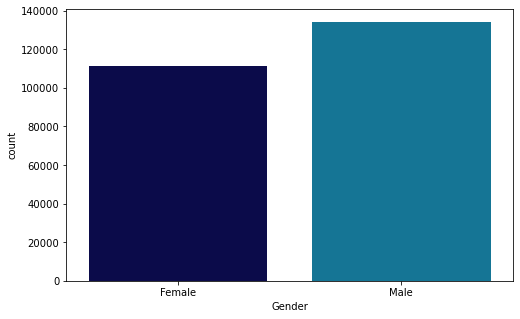

In [21]:
print('Understanding based on Gender')

plt.figure(figsize=(8,5))
sns.countplot('Gender',data=train,palette='ocean')

**We can see that, Male customers are more**


The total number of regions are  35


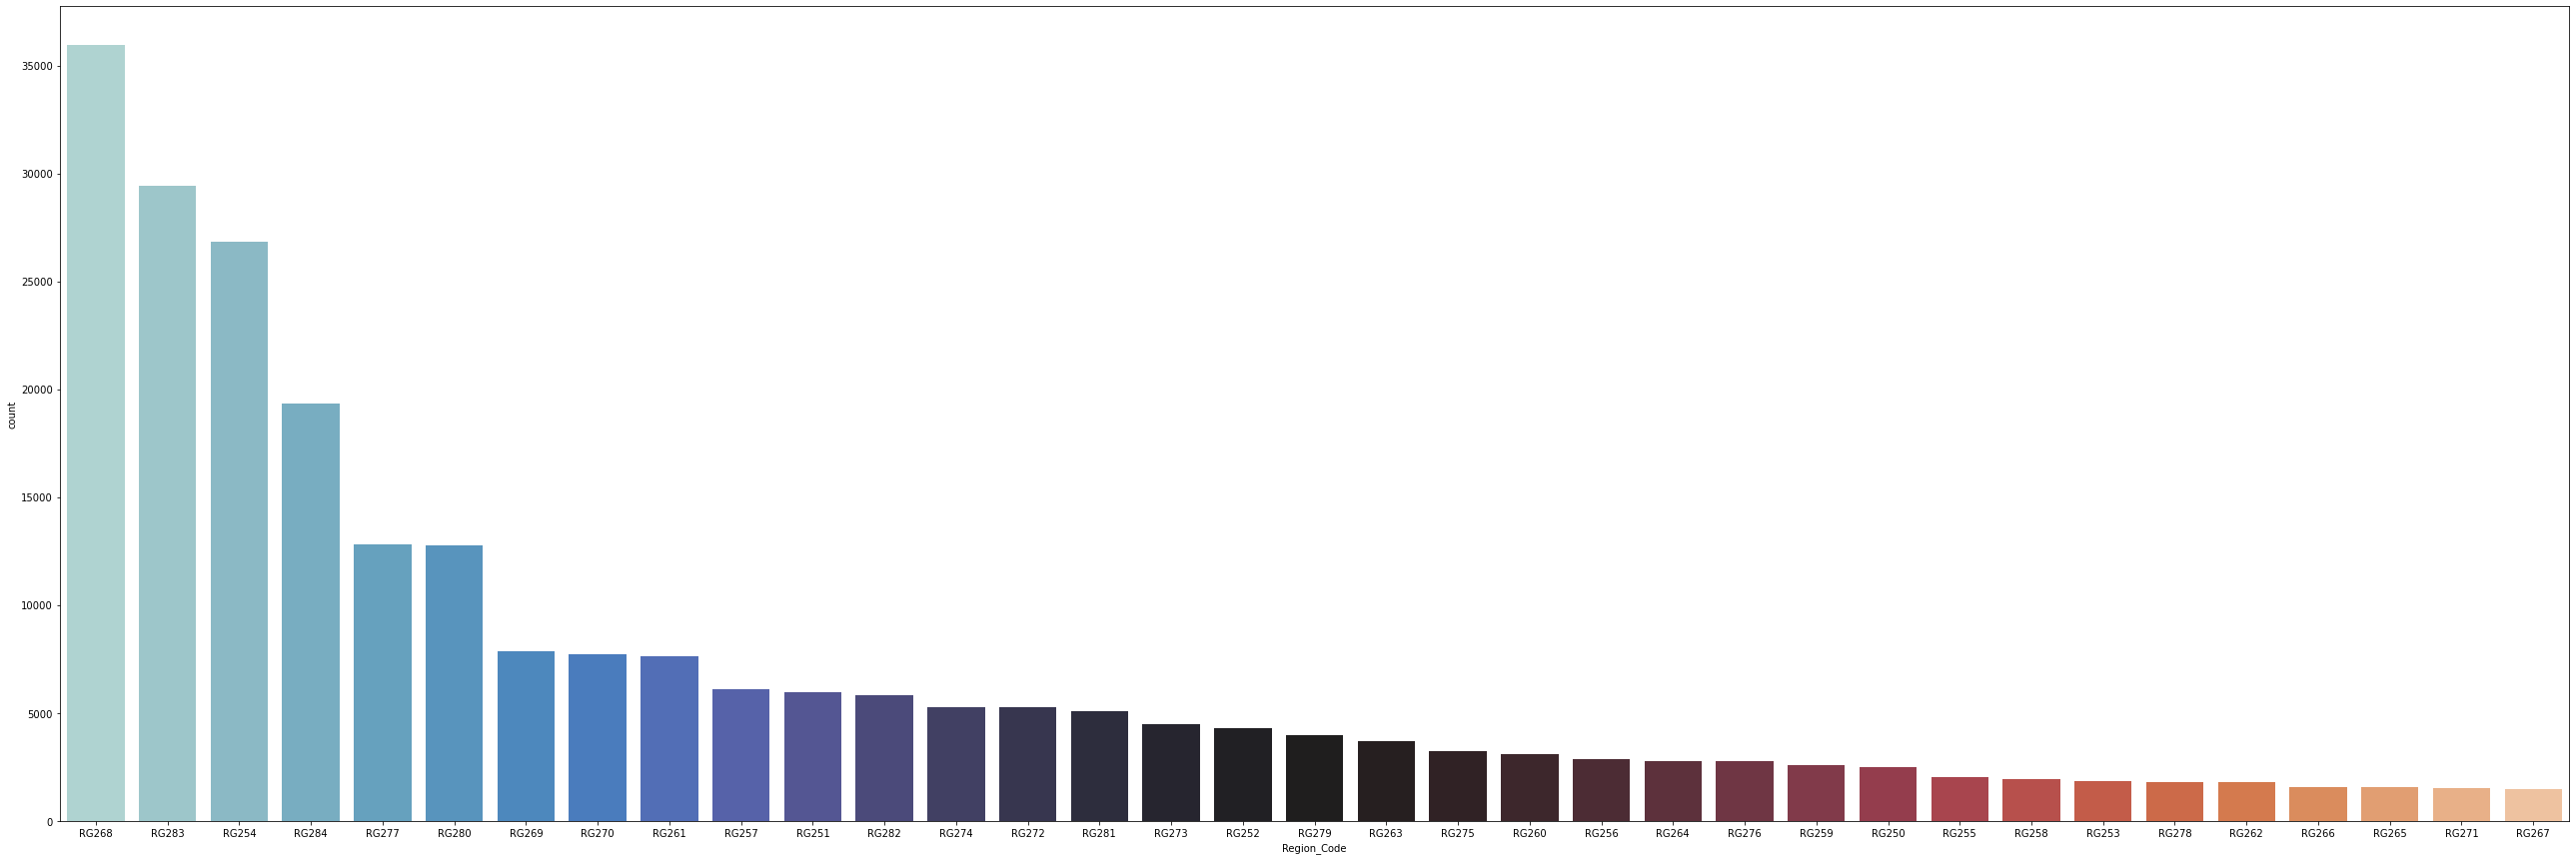

In [22]:
print('\nThe total number of regions are ',train['Region_Code'].nunique())
plt.figure(figsize=(45,15))
sns.countplot('Region_Code',data=train,palette='icefire',order = train['Region_Code'].value_counts().index)

**Top three customer regions codes are RG268,RG283,RG254 out of 35 regions**

The customers have  4  kinds of occupation categories


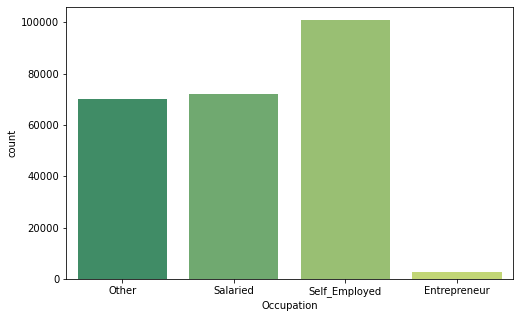

In [23]:
print('The customers have ',train['Occupation'].nunique(),' kinds of occupation categories')

plt.figure(figsize=(8,5))
sns.countplot('Occupation',data=train,palette='summer')

**Most of the customers are self-employed**


The customers are categorised into  4  Channel codes.


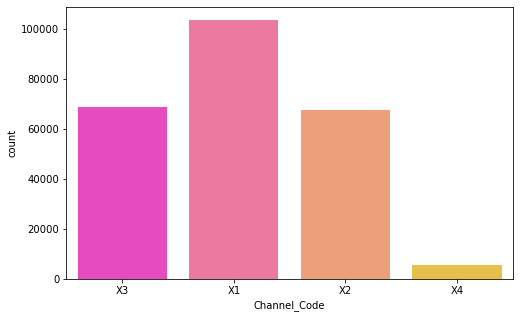

In [24]:
print('\nThe customers are categorised into ',train['Channel_Code'].nunique(),' Channel codes.')

plt.figure(figsize=(8,5))
sns.countplot('Channel_Code',data=train,palette='spring')

**Most of the customers belong to X1 Channel**


Analysis based on Credit_Products


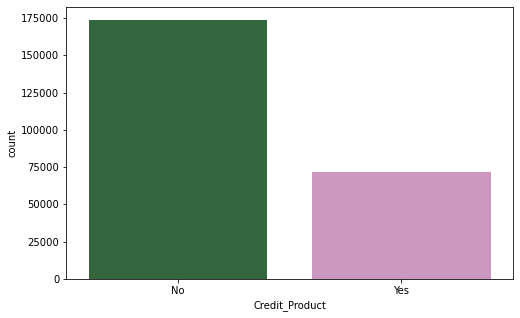

In [25]:
print('\nAnalysis based on Credit_Products')

plt.figure(figsize=(8,5))
sns.countplot('Credit_Product',data=train,palette='cubehelix')

**Many people do not owe credit products**

In [26]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,245725.0,4.385631e+01,14.828672,23.0,30.0,43.0,54.0,85.0
Vintage,245725.0,4.695914e+01,32.353136,7.0,20.0,32.0,73.0,135.0
Avg_Account_Balance,245725.0,1.128403e+06,852936.356069,20790.0,604310.0,894601.0,1366666.0,10352009.0


In [27]:
train.corr(method='pearson')

,Age,Vintage,Avg_Account_Balance
Age,1.000000,0.631242,0.145232
Vintage,0.631242,1.000000,0.167433
Avg_Account_Balance,0.145232,0.167433,1.000000


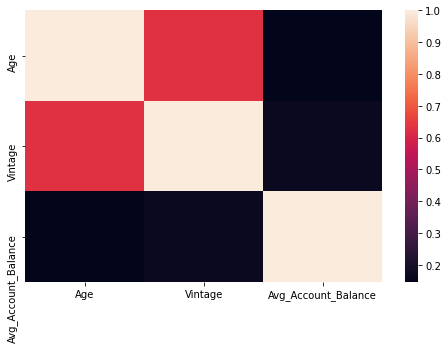

In [28]:
plt.figure(figsize=(8,5))
corr=train.corr(method='pearson')
sns.heatmap(corr)

In [29]:
# Checking each attribute's skew
train.skew()

Age                    0.618992
Vintage                0.790189
Avg_Account_Balance    2.968727
Is_Lead                1.235596
dtype: float64

**The skewness values shows all the three numerical colums are moderately skewed. Average account balance alone hihly skewed and it wont much affect the model perfprmance**

0.6189922275209511


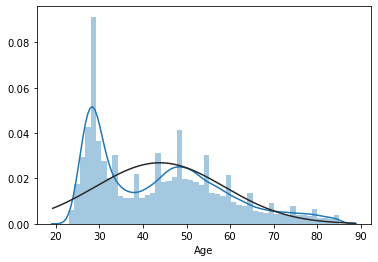

In [30]:
import scipy.stats as stats
sns.distplot(train['Age'],fit=stats.norm)
print(train['Age'].skew())

0.7901885721179357


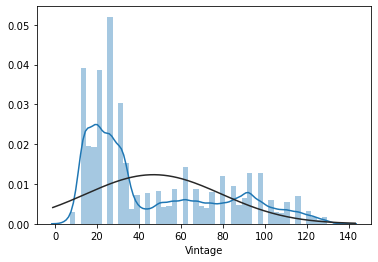

<Figure size 432x288 with 0 Axes>

In [31]:
print(train['Vintage'].skew())
sns.distplot(train['Vintage'], fit=stats.norm)
fig = plt.figure()

2.968726515557337


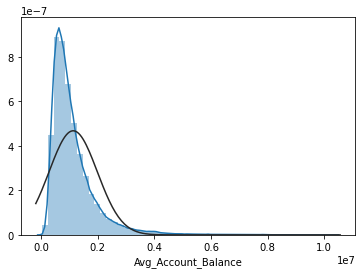

In [32]:
sns.distplot(train['Avg_Account_Balance'],fit=stats.norm)
print(train['Avg_Account_Balance'].skew())

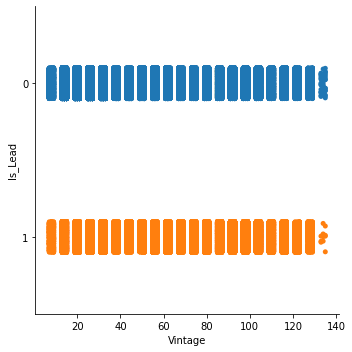

In [33]:
sns.catplot(x='Vintage',y='Is_Lead',data=train)

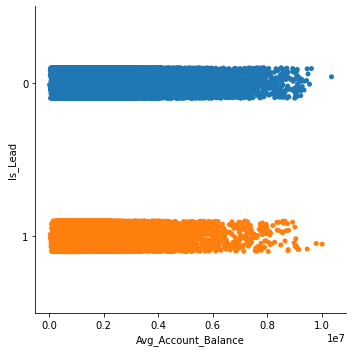

In [34]:
sns.catplot(x="Avg_Account_Balance",y="Is_Lead",data=train)

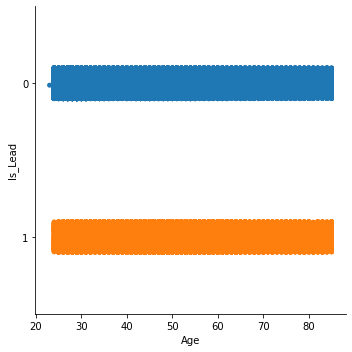

In [35]:
sns.catplot(x="Age", y="Is_Lead", data=train)

<Figure size 1440x1440 with 0 Axes>

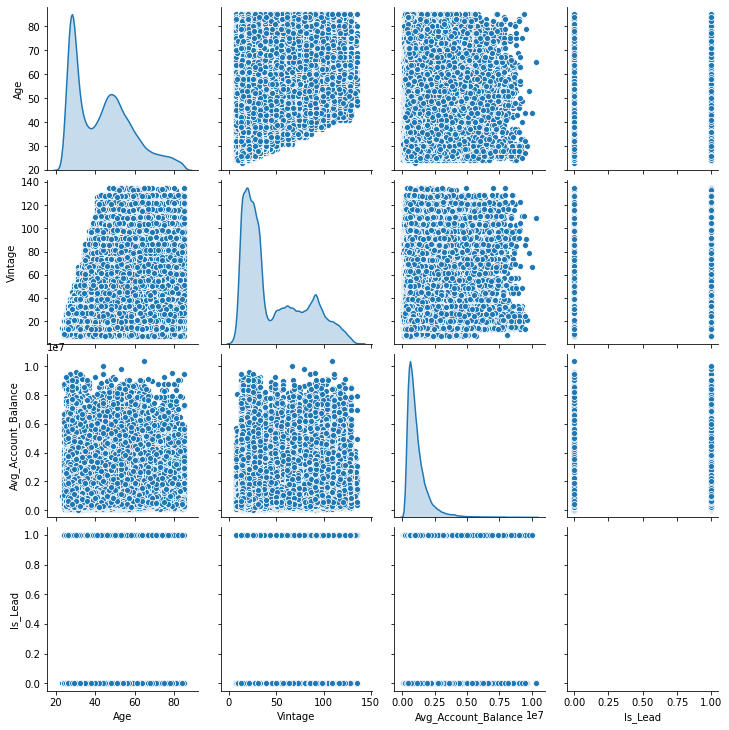

In [36]:
plt.figure(figsize=(20,20))
sns.pairplot(train,diag_kind='kde')

**From the heat map and pair plot the target variable is been given as continuous, but it should be categorical.Let's change it to categorical**

# Step 5 : Encoding

In [37]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [38]:
# Labelencoding
le = LabelEncoder()
var_mod = train.select_dtypes(include='object').columns
for i in var_mod:
    train[i] = le.fit_transform(train[i])
    
for i in var_mod:
    test[i] = le.fit_transform(test[i])

In [39]:
# Seperate Features and Target
X= train.drop(columns = ['Is_Lead'], axis=1)  # input
Y= train['Is_Lead']                           # target

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X) # Applying the Standardization function 
standardX = scaler.transform(X)

In [41]:
print("Original Data: nn", train.values)
print("nStandardized Data: nn", standardX[0:11,:])

Original Data: nn [[179194 0 73 ... 1045696 0 0]
 [131013 0 30 ... 581988 0 0]
 [121520 0 56 ... 1484315 1 0]
 ...
 [111270 0 26 ... 670659 0 0]
 [111156 0 28 ... 407504 0 0]
 [60342 1 29 ... 1129276 0 0]]
nStandardized Data: nn [[ 0.79413886 -1.09693134  1.96536499 -0.17238886 -1.29227941  1.23992486
  -0.12237297 -0.64404838 -0.09696769 -0.79687242]
 [ 0.1149085  -1.09693134 -0.9344286   0.65582975 -0.12097483 -1.02037519
  -0.46237162 -0.64404838 -0.64062953 -0.79687242]
 [-0.01891881 -1.09693134  0.81893497 -0.17238886  1.05032976  1.23992486
  -0.64782543 -0.64404838  0.41727923  1.25490602]
 [-0.92463917  0.91163408 -0.66468036  0.01165972 -0.12097483 -1.02037519
  -0.8641882  -0.64404838 -0.77139453 -0.79687242]
 [ 1.22281483 -1.09693134 -0.9344286   1.11595121 -0.12097483 -1.02037519
  -0.43146265 -0.64404838 -0.28327623 -0.79687242]
 [-1.08688699  0.91163408  0.81893497 -0.8165589   1.05032976 -1.02037519
  -0.46237162 -0.64404838 -0.68497642  1.25490602]
 [-0.3933336   0.9116

# Step 6 : Model building

# Train Test split for model building

In [42]:
seed = 42
# 30% data as validation set
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=seed)

In [43]:
# Train models
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [44]:
model1 = LogisticRegression()   # Logistic regression
model2 = KNeighborsClassifier() # KNN
model3 = LinearDiscriminantAnalysis()
model4 = GaussianNB()
model5 = DecisionTreeClassifier()
model6 = XGBClassifier()
model7 = GradientBoostingClassifier()
model8 = RandomForestClassifier()
#fit model
model1.fit(X_train,Y_train)
model2.fit(X_train,Y_train)
model3.fit(X_train,Y_train)
model4.fit(X_train,Y_train)
model5.fit(X_train,Y_train)
model6.fit(X_train,Y_train)
model7.fit(X_train,Y_train)
model8.fit(X_train,Y_train)
#Predict probabilities
ypred_1 = model1.predict_proba(X_test)
ypred_2 = model2.predict_proba(X_test)
ypred_3 = model3.predict_proba(X_test)
ypred_4 = model4.predict_proba(X_test)
ypred_5 = model5.predict_proba(X_test)
ypred_6 = model6.predict_proba(X_test)
ypred_7 = model7.predict_proba(X_test)
ypred_8 = model8.predict_proba(X_test)

[03:57:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [45]:
fpr1,tpr1,thresh1 = roc_curve(Y_test,ypred_1[:,1],pos_label=1)
fpr2,tpr2,thresh2 = roc_curve(Y_test,ypred_2[:,1],pos_label=1)
fpr3,tpr3,thresh3 = roc_curve(Y_test,ypred_3[:,1],pos_label=1)
fpr4,tpr4,thresh4 = roc_curve(Y_test,ypred_4[:,1],pos_label=1)
fpr5,tpr5,thresh5 = roc_curve(Y_test,ypred_5[:,1],pos_label=1)
fpr6,tpr6,thresh6 = roc_curve(Y_test,ypred_6[:,1],pos_label=1)
fpr7,tpr7,thresh7 = roc_curve(Y_test,ypred_7[:,1],pos_label=1)
fpr8,tpr8,thresh8 = roc_curve(Y_test,ypred_8[:,1],pos_label=1)


In [46]:
roc_auc_1 = roc_auc_score(Y_test,ypred_1[:,1])
roc_auc_2 = roc_auc_score(Y_test,ypred_2[:,1])
roc_auc_3 = roc_auc_score(Y_test,ypred_3[:,1])
roc_auc_4 = roc_auc_score(Y_test,ypred_4[:,1])
roc_auc_5 = roc_auc_score(Y_test,ypred_5[:,1])
roc_auc_6 = roc_auc_score(Y_test,ypred_6[:,1])
roc_auc_7 = roc_auc_score(Y_test,ypred_7[:,1])
roc_auc_8 = roc_auc_score(Y_test,ypred_8[:,1])


# Printing ROC_AUC score for all the models built

In [47]:
print('Logistic Regression : ',roc_auc_1,'\nKNN : ',roc_auc_2,'\nLinear Discriminant Analysis: ',roc_auc_3,
      '\nGaussianNB : ',roc_auc_4,'\nDecisionTree Classifier : ',roc_auc_5,'\nXGBoost :',roc_auc_6,
      '\nGradientBoost: ', roc_auc_7, '\nRAndomForest Classifier : ', roc_auc_8)

Logistic Regression :  0.5702474838092962 
KNN :  0.5132606570226926 
Linear Discriminant Analysis:  0.7168400199277718 
GaussianNB :  0.6934233068917991 
DecisionTree Classifier :  0.6035840952010894 
XGBoost : 0.7837366583970948 
GradientBoost:  0.7800995427469887 
RAndomForest Classifier :  0.7654496911117992


# XGBoost Classifier has the highest roc_auc score and Randomforest classifier also performs well

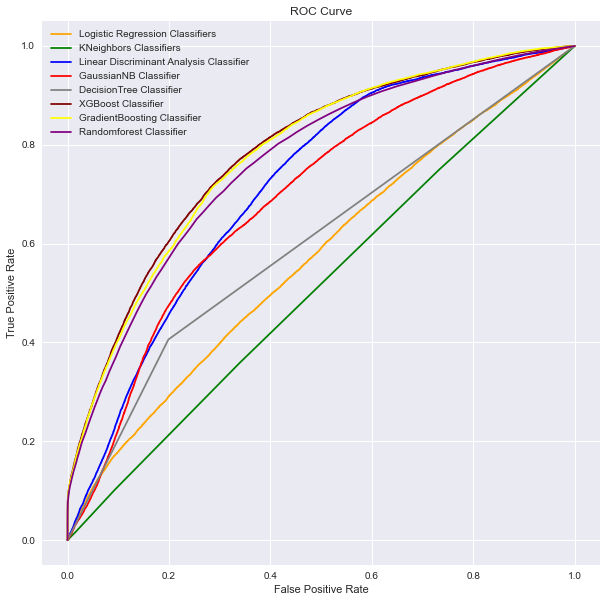

In [48]:
# lets plot ROC curves
import matplotlib.pyplot as plt
plt.style.use('seaborn')

plt.figure(figsize=(10,10))
plt.plot(fpr1,tpr1, color='orange',label='Logistic Regression Classifiers')
plt.plot(fpr2,tpr2, color='green',label='KNeighbors Classifiers')
plt.plot(fpr3,tpr3, color= 'blue', label='Linear Discriminant Analysis Classifier')
plt.plot(fpr4,tpr4, color='red',label='GaussianNB Classifier')
plt.plot(fpr5,tpr5, color='Grey',label='DecisionTree Classifier')
plt.plot(fpr6,tpr6, color='Maroon',label='XGBoost Classifier')
plt.plot(fpr7,tpr7, color= 'yellow',label='GradientBoosting Classifier')
plt.plot(fpr8,tpr8, color= 'purple', label ='Randomforest Classifier')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()

**ROC curve shows that the roc-auc value is high for XGBoost classifier, so I am choosing that as the final model**

# Final Model

In [ ]:
**Based on the roc-auc scores of all models, I choose XGBoost as best performing model and predicting the test data.**

In [49]:
model = XGBClassifier()
model.fit(X, Y)
final_predictions = model.predict(test)

[04:00:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [50]:
print(final_predictions)

[0 0 0 ... 1 1 0]


In [51]:
final_predictions.shape

(105312,)

In [52]:
test.shape

(105312, 10)

In [53]:
import csv

dataframe=pd.DataFrame(test, columns=['ID']) 
dataframe['Is_lead'] = final_predictions
print (dataframe)
dataframe.to_csv('predictions_final.csv')

           ID  Is_lead
0       94233        0
1       28747        0
2       94883        0
3       90941        0
4       87803        0
...       ...      ...
105307  33196        1
105308  31821        1
105309  52132        1
105310   1477        1
105311  41693        0

[105312 rows x 2 columns]


# Output is exported as predictions_final.csv